In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from importlib import reload

import TSManager as ts

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
reload(ts)
mgr = ts.TSManager()

In [3]:
mgr.load()

Loading OIL
Loading BY
Loading CAPE
Loading IC
Loading MA
Loading BM
Loading PE
Loading CPI
Loading SPX
Loading PCR
Loading DEF
Loading NOS
Loading VRP
Loading SI
Loading PCAPrice
Loading DP
Loading BDI
Loading CAY
Loading TERM


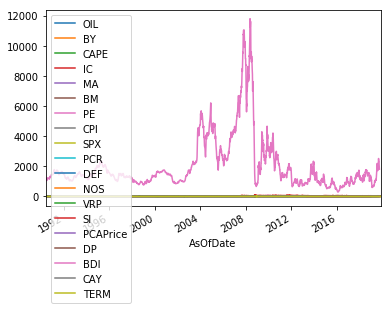

In [4]:
mgr.data.plot()

Text(0.5, 1.0, 'Percent missing data by feature')

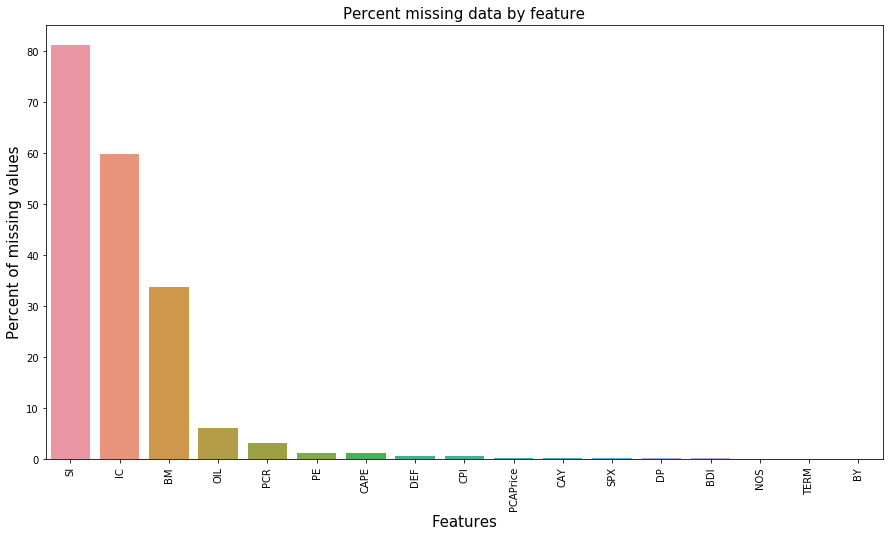

In [5]:
all_data_na = (mgr.data.isna().sum() / len(mgr.data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:17]
f, ax = plt.subplots(figsize=(15, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [63]:
#future return
data=mgr.data.copy()
data['R_1M']=data['SPX'].index.map(
lambda x: (1+data.truncate(before=x, after=x + pd.Timedelta(30,unit='d'))['SPX']).prod()-1)
data['R_3M']=data['SPX'].index.map(
lambda x: (1+data.truncate(before=x, after=x + pd.Timedelta(91,unit='d'))['SPX']).prod()-1)
data['R_6M']=data['SPX'].index.map(
lambda x: (1+data.truncate(before=x, after=x + pd.Timedelta(182,unit='d'))['SPX']).prod()-1)
data['R_12M']=data['SPX'].index.map(
lambda x: (1+data.truncate(before=x, after=x + pd.Timedelta(365,unit='d'))['SPX']).prod()-1)

In [ ]:
data['R_1M'][-26:]

In [56]:
data['R_1M'][-26:]=np.nan
data['R_3M'][-26:]=np.nan
data['R_6M'][-26:]=np.nan
data['R_12M'][-26:]=np.nan

C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [62]:
data['R_1M'][:]

AsOfDate
1990-06-08    NaN
1990-06-11    NaN
1990-06-12    NaN
1990-06-13    NaN
1990-06-14    NaN
             ... 
2019-10-30    0.0
2019-10-31    0.0
2019-11-01    0.0
2019-11-04    0.0
2019-11-05    0.0
Name: R_1M, Length: 7411, dtype: float64

In [28]:
#future return, wrong method
#data=mgr.data.copy()
#data['R_1M']=((1+data['SPX']).rolling('30d').apply(np.prod, raw=True) - 1).shift(-20)
#data['R_3M']=((1+data['SPX']).rolling('91d').apply(np.prod, raw=True) - 1).shift(-62)
#data['R_6M']=((1+data['SPX']).rolling('182d').apply(np.prod, raw=True) - 1).shift(-126)
#data['R_12M']=((1+data['SPX']).rolling('365d').apply(np.prod, raw=True) - 1).shift(-252)

In [30]:
data.to_pickle('data.pkl')